Following Mandal and Huo in their J. Phys. Chem. Lett. paper [here](https://pubs.acs.org/doi/abs/10.1021/acs.jpclett.9b01599), we will define the polariton Hamiltonian as follows:

\begin{equation}
\hat{H}_{pl} = \hat{H}_{el} + \hat{H}_p + \hat{H}_{el,p}
\end{equation}

where $\hat{H}_e$ denotes the electronic Hamiltonian:
\begin{equation}
\hat{H}_{el} = E_g(R) \: \hat{a}^{\dagger}_g \hat{a}_g + E_e(R) \: \hat{a}^{\dagger}_e \hat{a}_e,
\end{equation}
where $E_g(R)$ ($E_e(R)$) denotes the ground- (excited-) state electronic energy at nuclear coordinate $R$, and
$\hat{a}^{\dagger}_p$ ($\hat{a}_p$) are the creation (annihilation) operators for electronic state $p$.
The following matrix elements are equal to 1 using these operators and the basis states spanning $|g\rangle , |e\rangle$.
\begin{align}
\langle g | \hat{a}^{\dagger}_g \hat{a}_g | g \rangle = 1 \\
\langle e | \hat{a}^{\dagger}_e \hat{a}_e | e \rangle = 1 \\
\langle g | \hat{a}^{\dagger}_g \hat{a}_e | e \rangle = 1 \\
\langle e | \hat{a}^{\dagger}_e \hat{a}_g | g \rangle = 1; 
\end{align}
all other are zero.


The photon Hamiltonian is 
\begin{equation}
\hat{H}_p = \hbar \omega_c \left(\hat{b}^{\dagger} \hat{b} + \frac{1}{2}  \right),
\end{equation}
where $\hat{b}^{\dagger}$ and $\hat{b}$ denote the raising/lowering operators for the photon states, respectively.
The raising operator has the general effect on the basis states $|n\rangle$,
\begin{equation}
\hat{b}^{\dagger} |n\rangle = \sqrt{n+1} |n+1\rangle,
\end{equation}
while the lowering operator has the general effect
\begin{equation}
\hat{b} |n\rangle = \sqrt{n} |n-1\rangle;
\end{equation}
importantly, $\hat{b} |0\rangle  = 0$.  Both the photon and the electronic basis states form an orthonormal 
set, such that
\begin{equation}
\langle i | j \rangle = \delta_{ij}.
\end{equation}

Following Eq. S2 from Mandal and Huo, we compute $E_g(R)$ and $E_e(R)$ using the following code (see S2 in [this document](https://pubs.acs.org/doi/suppl/10.1021/acs.jpclett.9b01599/suppl_file/jz9b01599_si_001.pdf) for explicit equations):

In [5]:
import numpy as np
from numpy import linalg as LA
import math
from matplotlib import pyplot as plt

### Function to return the ground and excited-state electronic energy as a function of
### the nuclear coordinate $R$
def E_of_R(R):
    Ai = np.array([0.049244, 0.010657, 0.428129, 0.373005])
    Bi = np.array([0.18, 0.18, 0.18, 0.147])
    Ri = np.array([-0.75, 0.85, -1.15, 1.25])
    Di = np.array([0.073, 0.514])
    
    v = Ai + Bi*(R - Ri)**2
    
    Eg = 0.5*(v[0] + v[1]) - np.sqrt(Di[0]**2 + 0.25 * (v[0] - v[1])**2)
    Ee = 0.5*(v[2] + v[3]) - np.sqrt(Di[1]**2 + 0.25 * (v[2] - v[3])**2)
    return [Eg, Ee]
    

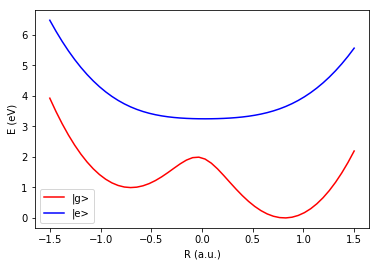

In [8]:
### Code to run E_of_R function for a variety of values of R between -1.5 and 1.5 atomic units
### and plot the energy in electron volts for the ground- and excited-state surface, 
### giving the plot from Figure 2 of Mandal and Huo's paper
rlist = np.linspace(-1.5, 1.5, 50)

E_ground = []
E_excite = []
for r in rlist:
    PES = E_of_R(r)
    E_ground.append(PES[0]*27.211)
    E_excite.append(PES[1]*27.211)
    
plt.plot(rlist, E_ground, 'red', label='|g>')
plt.plot(rlist, E_excite, 'blue', label='|e>')
plt.xlabel("R (a.u.)")
plt.ylabel("E (eV)")
plt.legend()
plt.show()